## Visualize Centrality Measures
### Jacob Jameson

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [3]:
def draw(G, pos, measures, measure_name, name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.viridis, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.savefig(name, format="svg")
    plt.show()

We will use two networks to visualize how different measures of centrality can be used. We will use both a directed and undirected graph to visualize how relative centrality is impacted.

In [4]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=675)

In [153]:
DiG = nx.DiGraph()
DiG.add_edges_from([(2, 3), (3, 2), (4, 1), (4, 2), (5, 2), (5, 4),
                    (5, 6), (6, 2), (6, 5), (7, 2), (7, 5), (8, 2),
                    (8, 5), (9, 2), (9, 5), (10, 5), (11, 5)])

dpos = {1: [0.1, 0.9], 2: [0.4, 0.8], 3: [0.8, 0.9], 4: [0.15, 0.55],
        5: [0.5,  0.5], 6: [0.8,  0.5], 7: [0.22, 0.3], 8: [0.30, 0.27],
        9: [0.38, 0.24], 10: [0.7,  0.3], 11: [0.75, 0.35]}

## Degree Centrality

*Degree* of a node is basically number of edges that it has. The basic intuition is that, nodes with more connections are more influential and important in a network. In other words, the person with higher friend count in a social network, the more cited paper (in-degree) in a scientific citation network is the one that is more central according to this metric.

For directed graphs, *in-degree*, number of incoming points, is considered as importance factor for nodes.

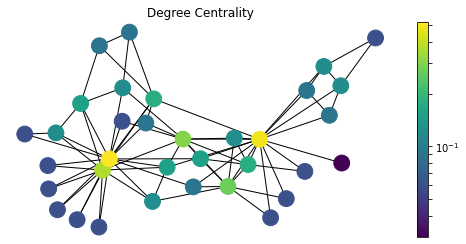

In [154]:
draw(G, pos, nx.degree_centrality(G),
     'Degree Centrality', "graphs/g degree centrality.svg")

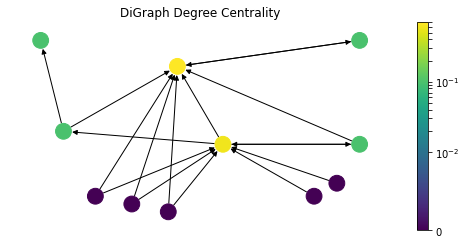

In [155]:
draw(DiG, dpos, nx.in_degree_centrality(DiG),
     'DiGraph Degree Centrality', "graphs/Dig degree centrality.svg")

## Eigenvector Centrality

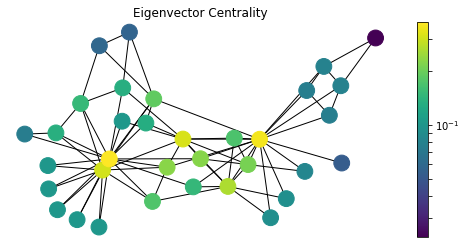

In [156]:
draw(G, pos, nx.eigenvector_centrality(G),
     'Eigenvector Centrality', "graphs/g eigenvector centrality.svg")

Eigenvector centrality is a basic extension of degree centrality, which defines centrality of a node as proportional to its neighbors’ importance. When we sum up all connections of a node, not all neighbors are equally important. Let’s consider two nodes in a friend network with same degree, the one who is connected to more central nodes should be more central.

First, we define an initial guess for the centrality of nodes in a graph as $x_i=1$. Now we are going to iterate for the new centrality value $x_i'$ for node $i$ as following:

$$x_i' = \sum_{j} A_{ij}x_j$$

Here $A_{ij}$ is an element of the adjacency matrix, where it gives 1 or 0 for whether an edge exists between nodes i and j. it can also be written in matrix notation as $\mathbf{x'} = \mathbf{Ax}$. We iterate over $t$ steps to find the vector $\mathbf{x}(t)$ as:

$$\mathbf{x}(t) = \mathbf{A^t x}(0)$$

The drawing also shows, the nodes which have the same number of connections are not necessarily in the same heat map color. The one that is connected to more central nodes are more hot in this visualization.

However, as we can see from the definition, it is a problematic measure for directed graphs. Let’s say that a new research paper is published and it references a handful of existing papers. It would not contribute to any of those referenced papers in this citation network because it is not cited by any other papers and has zero eigenvector centrality. In other words, eigenvector centrality would not take zero in-degree nodes into account in directed graphs such as citation networks.

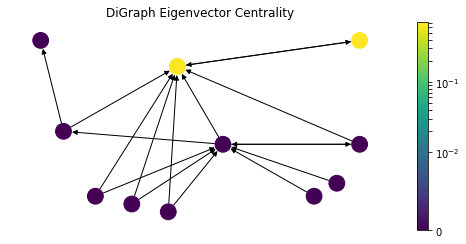

In [157]:
draw(DiG, dpos, nx.eigenvector_centrality_numpy(DiG), 
     'DiGraph Eigenvector Centrality', "graphs/Dig eigenvector centrality.svg")

Here the contribution from zero in-degree nodes is zero; consequently, all values are zero except two nodes which are referencing each other.

## Katz Centrality

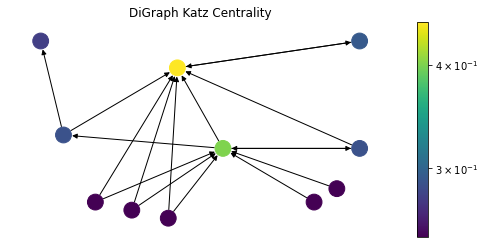

In [158]:
draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0),
     'DiGraph Katz Centrality', "graphs/Dig katz centrality.svg")

Katz centrality introduces two positive constants $\alpha$ and $\beta$ to tackle the problem of eigenvector centrality with zero in-degree nodes:

$$x_i = \alpha \sum_{j} A_{ij} x_j + \beta$$,

again $A_{ij}$ is an element of the adjacency matrix, and it can also be written in matrix notation as $\mathbf{x} = \alpha \mathbf{Ax} + \beta \mathbf{1}$. This $\beta$ constant gives a free centrality contribution for all nodes even though they don’t get any contribution from other nodes. The existence of a node alone would provide it some importance. $\alpha$ constant determines the balances between the contribution from other nodes and the free constant.

Although this method is introduced as a solution for directed graphs, it can be useful for some applications of undirected graphs as well.

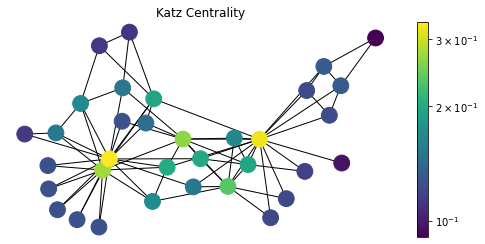

In [159]:
draw(G, pos, nx.katz_centrality(G, alpha=0.1, beta=1.0), 'Katz Centrality',
    "graphs/g katz centrality.svg")

## PageRank

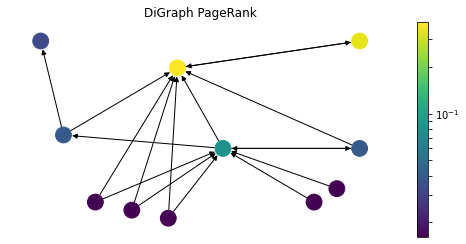

In [160]:
draw(DiG, dpos, nx.pagerank(DiG, alpha=0.85),
     'DiGraph PageRank', "graphs/Dig pagerank centrality.svg")

PageRank was introduced by the founders of Google to rank websites in search results. It can be considered as an extension of Katz centrality. The websites on the web can be modeled as a directed graph, where hypermedia links between websites determines the edges. Let’s consider a popular web directory website with high Katz centrality value which has millions of links to other websites. It would contribute to every single website significantly, nevertheless not all of them are important. To overcome that issue, contribution value is divided by out-degree of the node:

$$x_i = \alpha \sum_{j} A_{ij} \frac{x_j}{k_j^{out}} + \beta$$,

where $k_j^{out} = 1$ for zero out-degree nodes to avoid division by zero. It can also be written in matrix terms as:

$$\mathbf{x} = \alpha \mathbf{A D^{-1} x} + \beta \mathbf{1}$$,

where $\mathbf{D}$ is a diagonal matrix with elements $D_{ii} = max(k_i^{out}, 1)$.

As the drawing demonstrates, the nodes with fewer out-degree contributes way more to each node compared the Katz Centrality. Here the node at the top right gets only reference of a very important node, and it becomes way more important compared to the Katz Centrality; on the other hand, the node in the center which gets contribution from high out-degree nodes loses its importance.

## HITS Hubs and Authorities

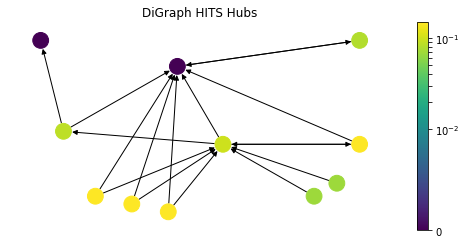

In [161]:
h,a = nx.hits(DiG)
draw(DiG, dpos, h, 
     'DiGraph HITS Hubs', "graphs/Dig HITS Hubs centrality.svg")

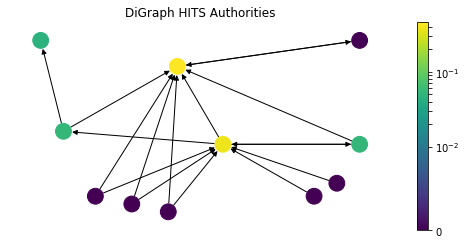

In [162]:
draw(DiG, dpos, a, 
     'DiGraph HITS Authorities', "graphs/Dig HITS Authorities centrality.svg")

Up until this point, we have discussed the measures that captures high node centrality, however, there can be nodes in the network which are important for the network, but they are not central. In particular, let’s consider a survey (review) article in a scientific citation network. The article itself is not necessarily stating a new discovery and it is not central; but nevertheless it is a helpful material to acquire knowledge on a topic because it captures a lot of central research articles. In order to find out such nodes, HITS algorithm introduces two types of central nodes: Hubs and Authorities. Authorities are the one that most cited by Hubs and Hubs are the one that citing the most high Authority nodes.

Authority Centrality is defined as the sum of the hub centralities which point to the node $i$:

$$x_i = \alpha \sum_{j} A_{ij} y_j$$,
where $\alpha$ is constant. Likewise, Hub Centrality is the sum of the authorities which are pointed by the node $i$:

$$y_i = \beta \sum_{j} A_{ji} x_j$$,
with constant $\beta$. Here notice that the element of the adjacency matrix are swapped for Hub Centrality because we are concerned with outgoing edges for hubs. So in matrix notation:

$$\mathbf{x} = \alpha \mathbf{Ay}, \quad$$
$$\mathbf{y} = \beta \mathbf{A^Tx}$$.
As it can be seen from the drawing, HITS Algorithm also tackles the problem with zero in-degree nodes of Eigenvector Centrality. These zero in-degree nodes become central hubs and contribute to other nodes. Yet we can still use a free centrality contribution constant like in Katz Centrality or other variants.

## Closeness Centrality

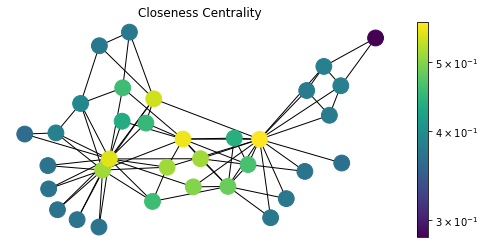

In [163]:
draw(G, pos, nx.closeness_centrality(G),
     'Closeness Centrality', "graphs/g closeness centrality.svg")

Closeness Centrality is a self-explanatory measure where each node’s importance is determined by closeness to all other nodes. Let $d_{ij}$ be the length of the shortest path between nodes $i$ and $j$, the average distance $l_i$ is such as:

$$l_i = \dfrac{1}{n} \sum_{j}d_{ij}$$
Since we are looking for the closer node, the Closeness Centrality $C_i$ is inverse proportional to average length $l_i$, so:

$$C_i = \dfrac{1}{l_i} = \dfrac{n}{\sum_{j}d_{ij}}$$
Here we are using an unweighted graph and all edges have weight 1 distance cost for calculating shortest path length $d_{ij}$. This measure can be used to determine the central distribution point in a delivery network.

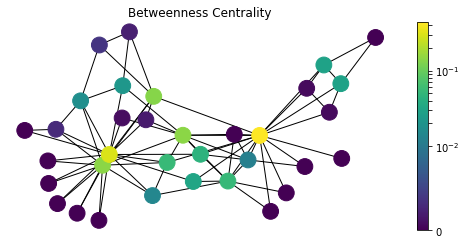

In [164]:
draw(G, pos, nx.betweenness_centrality(G),
     'Betweenness Centrality', "graphs/g betweenness centrality.svg")

Betweenness Centrality is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node. For starting node $s$, destination node $t$ and the input node $i$ that holds $s \ne t \ne i$, let $n_{st}^i$ be 1 if node i lies on the shortest path between $s$ and $t$; and $0$ if not. So the betweenness centrality is defined as:

$$x_i = \sum_{st} n_{st}^i$$
However, there can be more than one shortest path between $s$ and $t$ and that will count for centrality measure more than once. Thus, we need to divide the contribution to $g_{st}$, total number of shortest paths between $s$ and $t$.

$$x_i = \sum_{st} \frac{n_{st}^i}{g_{st}}$$

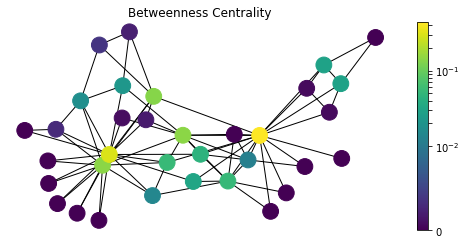

In [7]:
draw(G, pos, nx.betweenness_centrality(G),
     'Betweenness Centrality', "graphs/v.svg")